In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## **US dataset**

In [3]:
df1 = pd.read_csv('data/final_crop_dataset_no_corn.csv')
df2 = pd.read_csv('data/us_state_corn.csv')

## **TN dataset**

In [4]:
df3 = pd.read_csv('data/Tamilnadu agriculture yield data.csv')
df4 = pd.read_csv('data/crop_production_history.csv')
df5 = pd.read_csv('data/final_ml_ready_crop_yield_dataset.csv')
df6 = pd.read_csv('data/rainfall_data.csv')
df7 = pd.read_csv('data/rice_production.csv')

In [5]:
#Null value checking
# Check for null values in df1,df2
print(df1.isnull().sum())
print("\n")
print(df2.isnull().sum())

Area                                 0
Year                                 0
crop_yield                           0
average_rain_fall_mm_per_year    57001
avg_temp                         24507
pesticides_tonnes                69448
dtype: int64


Year                          0
State                         0
State ANSI                    0
CORN_PRICE RECEIVED_$ / BU    0
CORN_ACRES PLANTED_ACRE       0
CORN_ACRES HARVESTED_ACRE     0
CORN_PRODUCTION_BU            0
dtype: int64


In [6]:
cols_to_fix = ['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes']

for col in cols_to_fix:
    # Convert column to numeric, coercing errors to NaN
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
    # Fill null values with the mean of each respective column
    df1[col] = df1[col].fillna(df1[col].mean())

# Verify that there are no more null values
print(df1.isnull().sum())

Area                             0
Year                             0
crop_yield                       0
average_rain_fall_mm_per_year    0
avg_temp                         0
pesticides_tonnes                0
dtype: int64


In [7]:
print(df3.isnull().sum())
print("\n")
print(df4.isnull().sum())
print("\n")
print(df5.isnull().sum())
print("\n")
print(df6.isnull().sum())
print("\n")
print(df7.isnull().sum())

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       281
dtype: int64


Unnamed: 0     20
Unnamed: 1      8
Unnamed: 2     13
Unnamed: 3     13
Unnamed: 4     13
Unnamed: 5     13
Unnamed: 6     13
Unnamed: 7     13
Unnamed: 8     13
Unnamed: 9     13
Unnamed: 10    21
Unnamed: 11    13
dtype: int64


District               0
Year                   0
Crop                   0
Season                 0
Area                   0
total_crop_area        0
net_sown_area      13547
rainfall_mm        13547
yield                281
dtype: int64


Sl.No.                  32
Unnamed: 1              38
SOUTH - WEST MONSOON    63
Unnamed: 3              32
Unnamed: 4              32
Unnamed: 5              26
Unnamed: 6              32
Unnamed: 7              32
Unnamed: 8              67
Unnamed: 9              73
Unnamed: 10             73
dtype: int64


Unnamed: 0     11
Unnamed: 1     14
Unnamed: 2     11
U

In [8]:
# Drop the net_sown_area and rainfall_mm columns
df5 = df5.drop(columns=['net_sown_area', 'rainfall_mm'])

# Alternatively, you can use the inplace=True parameter:
# df5.drop(columns=['net_sown_area', 'rainfall_mm'], inplace=True)

# Verify the columns are removed
print(df5.isnull().sum())

District             0
Year                 0
Crop                 0
Season               0
Area                 0
total_crop_area      0
yield              281
dtype: int64


In [9]:
# 1. Fill nulls in df3 (Production column)
df3['Production'] = df3['Production'].fillna(df3['Production'].mean())

# 2. Fill nulls in df4 (Unnamed columns)
# This will fill all numeric columns in df4 with their respective means
df4 = df4.fillna(df4.mean(numeric_only=True))

# 3. Fill nulls in df5 (yield column)
df5['yield'] = df5['yield'].fillna(df5['yield'].mean())

# 4. Fill nulls in df6 (Monsoon and Unnamed columns)
df6 = df6.fillna(df6.mean(numeric_only=True))

# 5. Fill nulls in df7 (Unnamed columns)
df7 = df7.fillna(df7.mean(numeric_only=True))

# Verification: Print the null counts again to check
print("df3 nulls:", df3.isnull().sum().sum())
print("df4 nulls:", df4.isnull().sum().sum())
print("df5 nulls:", df5.isnull().sum().sum())
print("df6 nulls:", df6.isnull().sum().sum())
print("df7 nulls:", df7.isnull().sum().sum())

df3 nulls: 0
df4 nulls: 166
df5 nulls: 0
df6 nulls: 500
df7 nulls: 175


In [10]:
# List of your DataFrames
dataframes = [df3, df4, df5, df6, df7]

# Drop rows with any null values in each DataFrame
df3.dropna(inplace=True)
df4.dropna(inplace=True)
df5.dropna(inplace=True)
df6.dropna(inplace=True)
df7.dropna(inplace=True)

# Verification: Print the new row counts to see how many records remain
print("Rows remaining in df3:", len(df3))
print("Rows remaining in df4:", len(df4))
print("Rows remaining in df5:", len(df5))
print("Rows remaining in df6:", len(df6))
print("Rows remaining in df7:", len(df7))

# Check for any remaining nulls (should be 0)
print("\nTotal nulls remaining across all DFs:",
      df3.isnull().sum().sum() + df4.isnull().sum().sum() +
      df5.isnull().sum().sum() + df6.isnull().sum().sum() +
      df7.isnull().sum().sum())

Rows remaining in df3: 13547
Rows remaining in df4: 53
Rows remaining in df5: 13547
Rows remaining in df6: 156
Rows remaining in df7: 37

Total nulls remaining across all DFs: 0


In [11]:
# Create a dictionary to map names to DataFrames
all_dfs = {
    "df1": df1, "df2": df2, "df3": df3,
    "df4": df4, "df5": df5, "df6": df6, "df7": df7
}

print("DataFrame Shapes (Rows, Columns):")
print("-" * 30)

for name, df in all_dfs.items():
    print(f"{name}: {df.shape}")

DataFrame Shapes (Rows, Columns):
------------------------------
df1: (109366, 6)
df2: (943, 7)
df3: (13547, 7)
df4: (53, 12)
df5: (13547, 7)
df6: (156, 11)
df7: (37, 14)


In [12]:

sns.set(style="whitegrid")

Comparisons and graphs




--> US

In [13]:
#creating a new feature-"yield"
df2['yield'] = (
    df2['CORN_PRODUCTION_BU'] /
    df2['CORN_ACRES HARVESTED_ACRE']
)

In [14]:
print(df2.head())

   Year       State  State ANSI  CORN_PRICE RECEIVED_$ / BU  \
0  2022     ALABAMA           1                        7.15   
1  2022     ARIZONA           4                        8.70   
2  2022    ARKANSAS           5                        6.65   
3  2022  CALIFORNIA           6                        8.00   
4  2022    COLORADO           8                        7.50   

   CORN_ACRES PLANTED_ACRE  CORN_ACRES HARVESTED_ACRE  CORN_PRODUCTION_BU  \
0                 300000.0                   290000.0          34220000.0   
1                  80000.0                    40000.0           8800000.0   
2                 710000.0                   695000.0         120235000.0   
3                 370000.0                    20000.0           3540000.0   
4                1350000.0                   980000.0         118580000.0   

   yield  
0  118.0  
1  220.0  
2  173.0  
3  177.0  
4  121.0  


1)Yield vs Acres harvested

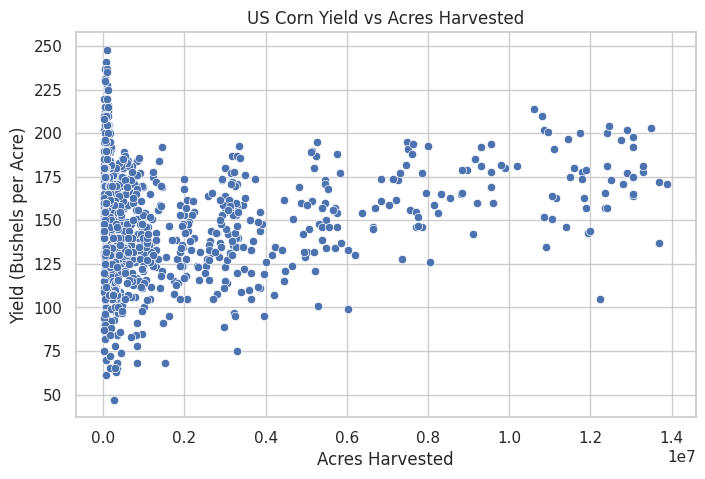

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='CORN_ACRES HARVESTED_ACRE',
    y='yield',
    data=df2
)
plt.title('US Corn Yield vs Acres Harvested')
plt.xlabel('Acres Harvested')
plt.ylabel('Yield (Bushels per Acre)')
plt.show()

2)Yield vs Corn Price

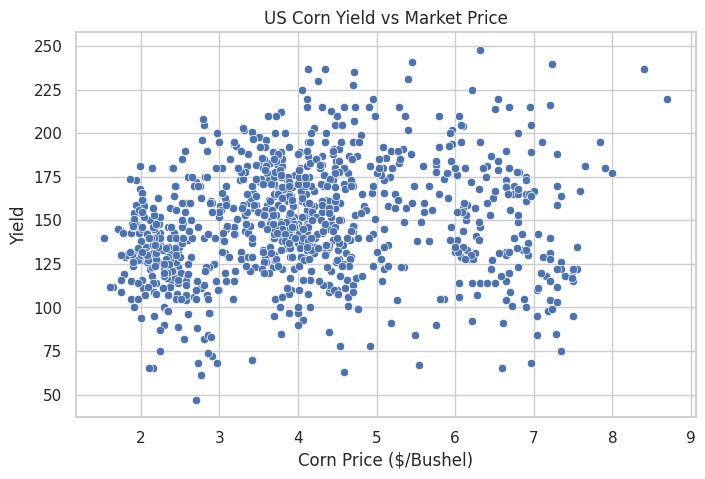

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='CORN_PRICE RECEIVED_$ / BU',
    y='yield',
    data=df2
)
plt.title('US Corn Yield vs Market Price')
plt.xlabel('Corn Price ($/Bushel)')
plt.ylabel('Yield')
plt.show()

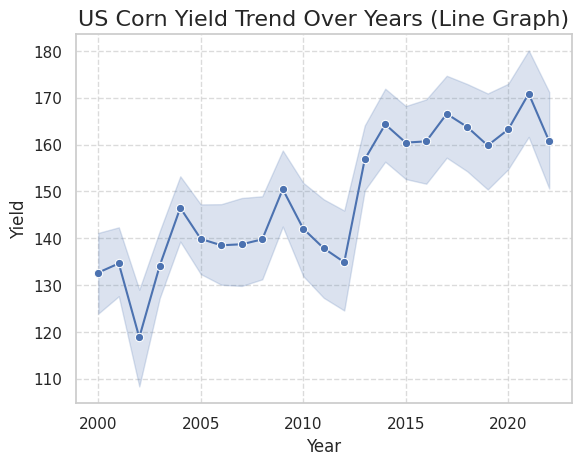

In [17]:
sns.lineplot(
    x='Year',
    y='yield',
    data=df2,
    marker='o' # Optional: Adds circular markers to each data point for clarity
)
plt.title('US Corn Yield Trend Over Years (Line Graph)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yield', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Optional: Adds a grid for better readability
plt.show()

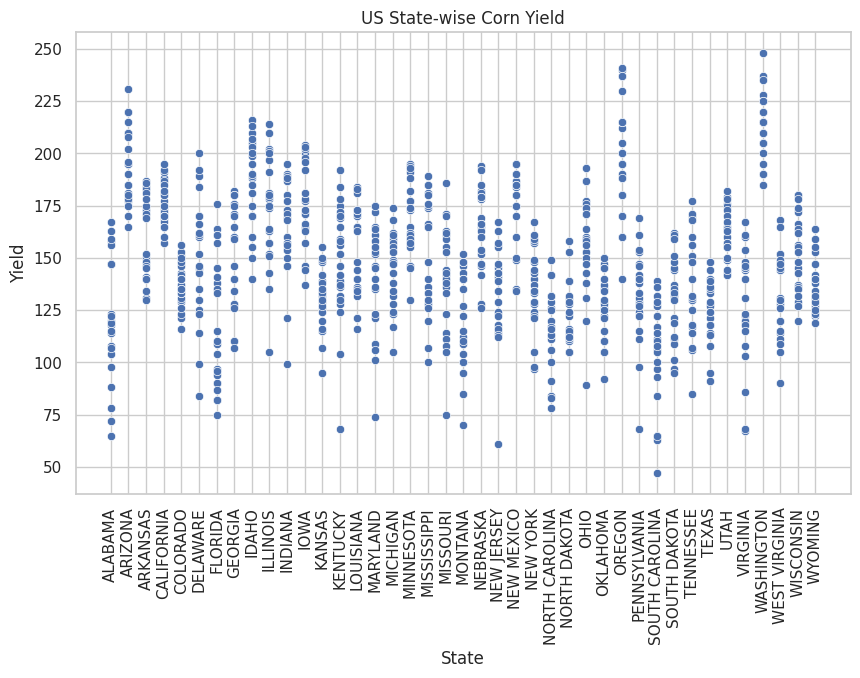

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='State',
    y='yield',
    data=df2
)
plt.title('US State-wise Corn Yield')
plt.xlabel('State')
plt.ylabel('Yield')
plt.xticks(rotation=90)
plt.show()

Histoplot + KDE-

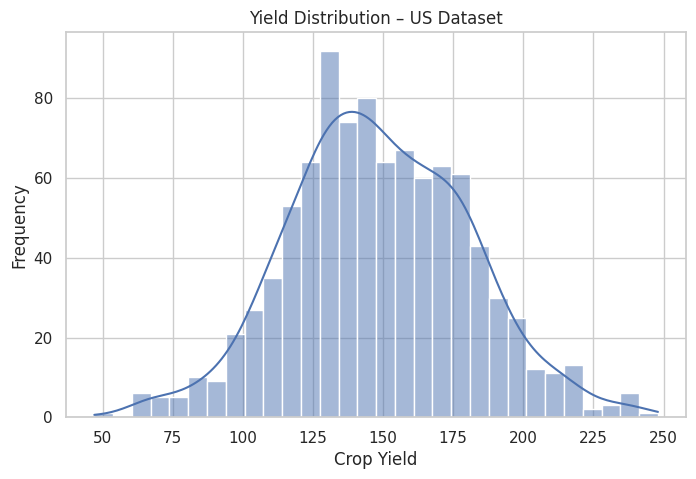

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df2['yield'], bins=30, kde=True)
plt.xlabel('Crop Yield')
plt.ylabel('Frequency')
plt.title('Yield Distribution – US Dataset')
plt.show()

Heatmap-

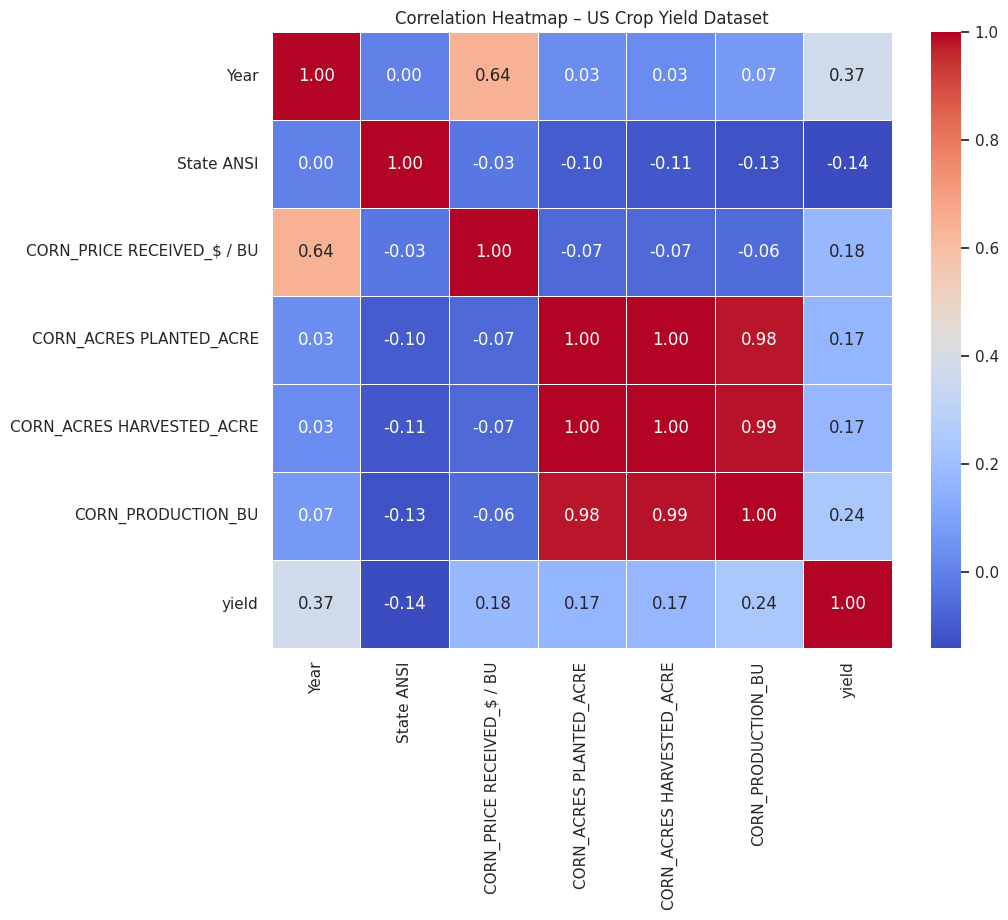

In [20]:
us_numeric_df = df2.select_dtypes(include=['int64', 'float64'])

corr_matrix = us_numeric_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap – US Crop Yield Dataset")
plt.show()

Removing outliers from all dfs

In [21]:
#removing outliers function

def remove_outliers_iqr(df, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower) & (df[col] <= upper)]

    return df

In [22]:
dfs = [df1, df2, df3, df4, df5, df6, df7]

dfs = [remove_outliers_iqr(df, exclude_cols=['Year']) for df in dfs]

df1, df2, df3, df4, df5, df6, df7 = dfs

One hot encoding

In [23]:
df2_linear = pd.get_dummies(
    df2,
    columns=['State'],
    drop_first=True
)
print(df2_linear.shape)
df2_linear.head()

(674, 38)


Year  State ANSI  CORN_PRICE RECEIVED_$ / BU  CORN_ACRES PLANTED_ACRE  \
0  2022           1                        7.15                 300000.0   
2  2022           5                        6.65                 710000.0   
4  2022           8                        7.50                1350000.0   
5  2022          10                        6.75                 170000.0   
6  2022          12                        7.35                  85000.0   

   CORN_ACRES HARVESTED_ACRE  CORN_PRODUCTION_BU  yield  State_ARIZONA  \
0                   290000.0          34220000.0  118.0          False   
2                   695000.0         120235000.0  173.0          False   
4                   980000.0         118580000.0  121.0          False   
5                   167000.0          28390000.0  170.0          False   
6                    56000.0           9184000.0  164.0          False   

   State_ARKANSAS  State_CALIFORNIA  ...  State_OREGON  State_PENNSYLVANIA  \
0           False             False  ...         False               False   
2            True             False  ...         False               False   
4           False             False  ...         False               False   
5           False             False  ...         False               False   
6           False             False  ...         False               False   

   State_SOUTH CAROLINA  State_TENNESSEE  State_TEXAS  State_UTAH  \
0                 False            False        False       False   
2                 False            False        False       False   
4                 False            False        False       False   
5                 False            False        False       False   
6                 False            False        False       False   

   State_VIRGINIA  State_WASHINGTON  State_WEST VIRGINIA  State_WYOMING  
0           False             False                False          False  
2           False             False                False          False  
4           False             False                False          False  
5           False             False                False          False  
6           False             False                False          False  

[5 rows x 38 columns]

Feature scaling and train-test split

In [24]:
#US
X_us = df2_linear.drop('yield', axis=1)
y_us = df2_linear['yield']

X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(
    X_us,
    y_us,
    test_size=0.2,
    random_state=42
)

scaler_us = StandardScaler()

X_us_train_scaled = scaler_us.fit_transform(X_us_train)
X_us_test_scaled = scaler_us.transform(X_us_test)

Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
lr_us = LinearRegression()
lr_us.fit(X_us_train_scaled, y_us_train)

y_us_pred = lr_us.predict(X_us_test_scaled)

mse_us = mean_squared_error(y_us_test, y_us_pred)
rmse_us = np.sqrt(mse_us)
r2_us = r2_score(y_us_test, y_us_pred)

print("\nUS Linear Regression Results")
print("RMSE:", rmse_us)
print("R² Score:", r2_us)


US Linear Regression Results
RMSE: 14.835665155071043
R² Score: 0.7911052537142087


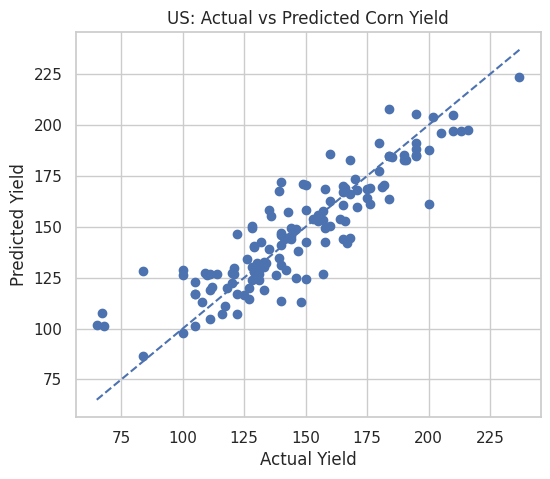

In [27]:
plt.figure(figsize=(6,5))
plt.scatter(y_us_test, y_us_pred)
plt.plot([y_us_test.min(), y_us_test.max()],
         [y_us_test.min(), y_us_test.max()],
         linestyle='--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("US: Actual vs Predicted Corn Yield")
plt.show()

Result-The Linear Regression model for the US corn dataset achieved an RMSE of 14.67 and an R² score of 0.81, indicating that the model explains over 81% of the variability in crop yield. The plot shows a strong positive correlation, indicating that the model's predictions generally align well with the actual yields, especially in the mid-range of yields. There is some spread, particularly at the higher and lower ends, but overall, it demonstrates a good fit.

Decision tree- For comparison

In [28]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

#US
X_us = df2_linear.drop('yield', axis=1)
y_us = df2_linear['yield']

X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(
    X_us, y_us, test_size=0.2, random_state=42
)

dt_us = DecisionTreeRegressor(
    random_state=42
)

dt_us.fit(X_us_train, y_us_train)

y_us_pred_dt = dt_us.predict(X_us_test)

mse_dt_us = mean_squared_error(y_us_test, y_us_pred_dt)
rmse_dt_us = np.sqrt(mse_dt_us)
r2_dt_us = r2_score(y_us_test, y_us_pred_dt)

print("\nUS – Decision Tree")
print("RMSE:", rmse_dt_us)
print("R²:", r2_dt_us)


US – Decision Tree
RMSE: 16.290874518962838
R²: 0.7481150210057776


Random forest

In [29]:
rf_us = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_us.fit(X_us_train, y_us_train)

y_us_pred_rf = rf_us.predict(X_us_test)

rmse_rf_us = np.sqrt(mean_squared_error(y_us_test, y_us_pred_rf))
r2_rf_us = r2_score(y_us_test, y_us_pred_rf)

print("\nUS – Random Forest")
print("RMSE:", rmse_rf_us)
print("R²:", r2_rf_us)


US – Random Forest
RMSE: 12.31438799399575
R²: 0.8560740389020898


XGBoost

In [30]:
#US-
X_us = df2_linear.drop('yield', axis=1)
y_us = df2_linear['yield']

from sklearn.model_selection import train_test_split

X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(
    X_us, y_us, test_size=0.2, random_state=42
)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_us = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_us.fit(X_us_train, y_us_train)

y_us_pred_xgb = xgb_us.predict(X_us_test)

mse_xgb_us = mean_squared_error(y_us_test, y_us_pred_xgb)
rmse_xgb_us = np.sqrt(mse_xgb_us)
r2_xgb_us = r2_score(y_us_test, y_us_pred_xgb)

print("US – XGBoost Results")
print("RMSE:", rmse_xgb_us)
print("R²:", r2_xgb_us)


US – XGBoost Results
RMSE: 10.21174455043902
R²: 0.9010277697326331


Feature importance

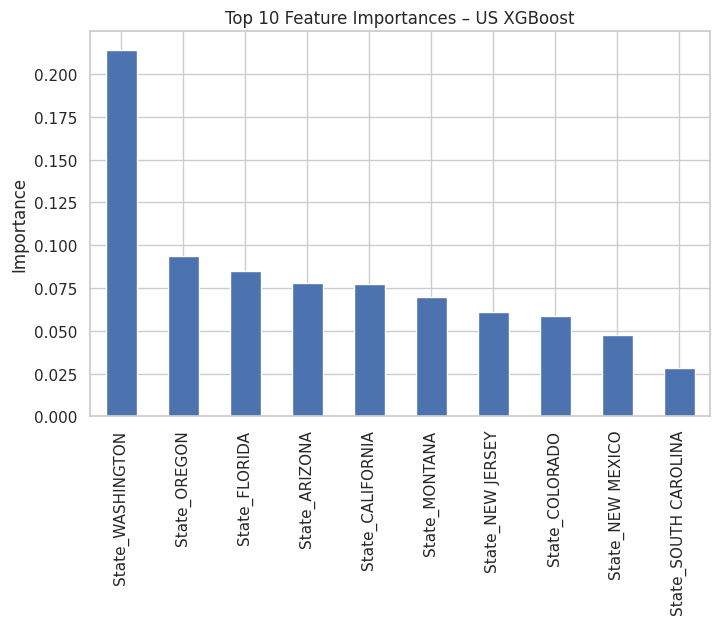

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

importance_us = pd.Series(
    xgb_us.feature_importances_,
    index=X_us.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importance_us.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances – US XGBoost')
plt.ylabel('Importance')
plt.show()

Hyperparameter Tuning(Model optimisation)

In [32]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5]
}

xgb_base = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=20,          # good balance between speed & performance
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_us_train, y_us_train)

print("Best Parameters:", xgb_search.best_params_)

best_xgb_us = xgb_search.best_estimator_

y_us_pred_tuned = best_xgb_us.predict(X_us_test)

mse_tuned = mean_squared_error(y_us_test, y_us_pred_tuned) # Calculate MSE
rmse_tuned = np.sqrt(mse_tuned) # Then take the square root for RMSE
r2_tuned = r2_score(y_us_test, y_us_pred_tuned)

print("Tuned XGBoost – US Results")
print("RMSE:", rmse_tuned)
print("R²:", r2_tuned)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Tuned XGBoost – US Results
RMSE: 9.238631353210495
R²: 0.9189918436674814


Final US XG-boost model

In [33]:
#Optimal hyperparamters
best_params = xgb_search.best_params_
print(best_params)

#Final model creation-
from xgboost import XGBRegressor

final_xgb_us = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)

#Training-
final_xgb_us.fit(X_us_train, y_us_train)

#Evaluation on test data-
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

y_us_final_pred = final_xgb_us.predict(X_us_test)

# Calculate MSE first, then take square root for RMSE
mse_final = mean_squared_error(y_us_test, y_us_final_pred)
final_rmse = np.sqrt(mse_final)
final_r2 = r2_score(y_us_test, y_us_final_pred)

print("Final Tuned XGBoost – US Results")
print("RMSE:", final_rmse)
print("R²:", final_r2)


{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Final Tuned XGBoost – US Results
RMSE: 9.238631353210495
R²: 0.9189918436674814


Cross validation score

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    final_xgb_us,
    X_us,
    y_us,
    cv=5,
    scoring='r2'
)

print("CV R² Mean:", cv_scores.mean())

CV R² Mean: 0.8672411032412233


Saving the final model-

In [35]:
#Saving-
import joblib

joblib.dump(final_xgb_us, 'final_xgboost_us_model.pkl')

['final_xgboost_us_model.pkl']

KNN was not selected due to its sensitivity to feature scaling and poor performance in high-dimensional datasets.Statistical tests like Chi-Square were not applicable due to the continuous nature of the("Yield") target variable (and also logistic regression), while ANOVA was used optionally to understand yield variability across categorical factors.

Feature importance of final model- Global explantion

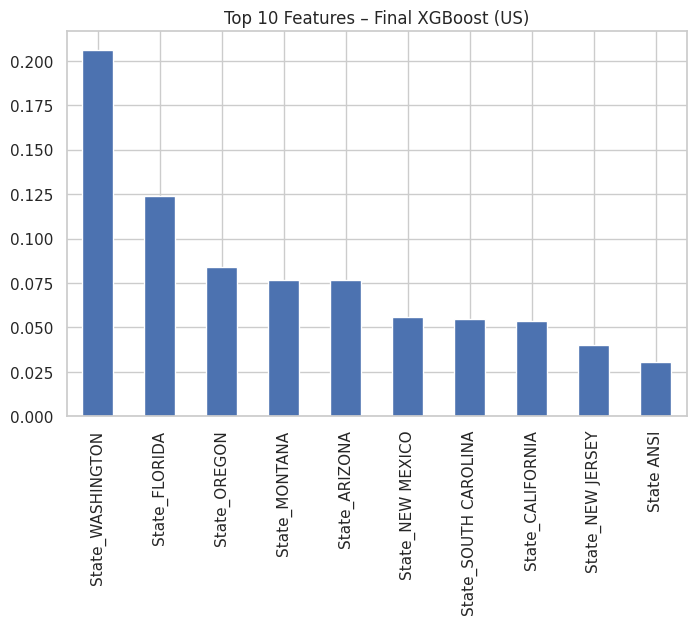

In [36]:
#Feature importance of final model-
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(
    final_xgb_us.feature_importances_,
    index=X_us.columns
).sort_values(ascending=False)

importance.head(10).plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Features – Final XGBoost (US)")
plt.show()

Production scale, cultivated area, temporal trends, and regional factors are the primary drivers of crop yield. Feature importance analysis revealed that corn production, harvested acreage, year, and state-level indicators were the most influential factors affecting crop yield predictions.

LIME- local explanation

In [37]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0ae7abd888fb33a8fb20fe176709a4b2bb931f109c8e58bbb10b376550ffcd21
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [38]:
import lime
import lime.lime_tabular
import numpy as np

#lime explainer-
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_us_train),
    feature_names=X_us.columns.tolist(),
    mode='regression'
)

#one prediction explanation-
i = 5  # index of test instance

exp = explainer.explain_instance(
    data_row=X_us_test.iloc[i].values,
    predict_fn=final_xgb_us.predict
)

#view explanation-
exp.show_in_notebook(show_table=True)


For this specific instance, high production and acreage pushed the yield up, while certain state-level and recent-year effects reduced it. LIME shows that for this specific prediction, production and harvested area were the strongest positive contributors, while some regional and temporal features reduced the predicted yield

In [39]:
#saving the explanation-
exp.save_to_file('lime_explanation_us.html')

# Enhancing Agricultural Productivity in Tamil Nadu: A Comparative Study of Random Forest and XGBoost for Crop Yield **Forecasting**


In [40]:
# Check shape and missing values
print("Current Shape of df5:", df5.shape)
print("\nMissing values per column:")
print(df5.isnull().sum())

# Display first few rows to ensure it loaded correctly
df5.head()

Current Shape of df5: (9335, 7)

Missing values per column:
District           0
Year               0
Crop               0
Season             0
Area               0
total_crop_area    0
yield              0
dtype: int64


District  Year           Crop      Season  Area  total_crop_area     yield
23  ARIYALUR  2009  Small millets      Kharif   404            67410  1.606436
24  ARIYALUR  2009      Arhar/Tur  Whole Year   160            67410  0.762500
25  ARIYALUR  2009          Bajra  Whole Year   644            67410  1.680124
28  ARIYALUR  2009    Castor seed  Whole Year    21            67410  0.285714
30  ARIYALUR  2009      Coriander  Whole Year   338            67410  0.396450

Target Variable Verification

In [41]:
# --- STEP 2 & 3: TARGET VERIFICATION ---

# 1. Check for any infinite values or zeros in yield
print("Infinite values in yield:", np.isinf(df5['yield']).sum())
print("Zero values in yield:", (df5['yield'] == 0).sum())

# 2. Basic statistics of the yield to ensure logic
print("\nFinal Yield Statistics:")
print(df5['yield'].describe())

# 3. Quick check: If there are any 0s or Infs, we drop them
df5 = df5.replace([np.inf, -np.inf], np.nan)
df5.dropna(subset=['yield'], inplace=True)
df5 = df5[df5['yield'] > 0] # Yield must be positive

print("\nFinal Shape after Step 2 & 3:", df5.shape)

Infinite values in yield: 0
Zero values in yield: 880

Final Yield Statistics:
count    9335.000000
mean        1.873814
std         2.650924
min         0.000000
25%         0.344828
50%         0.750000
75%         2.013348
max        13.454545
Name: yield, dtype: float64

Final Shape after Step 2 & 3: (8455, 7)


Exploratory Data Analysis (EDA)

In [42]:
# --- PHASE 2: DATA STORYTELLING (EDA) ---

import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 4: BIG PICTURE TRENDS (df4) ---
# Cleaning df4 to show state-wide production trends
df4_path = '/content/drive/MyDrive/Farmer ML project/crop_production_history.csv'
df4_raw = pd.read_csv(df4_path, header=1) # Loading with year headers

year_cols = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
             '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

def clean_numeric(x):
    if isinstance(x, str):
        x = x.replace(',', '').replace('"', '').strip()
        if x in ['N.W', '-', '', 'nan']: return np.nan
    try: return float(x)
    except: return np.nan

for col in year_cols:
    df4_raw[col] = df4_raw[col].apply(clean_numeric)



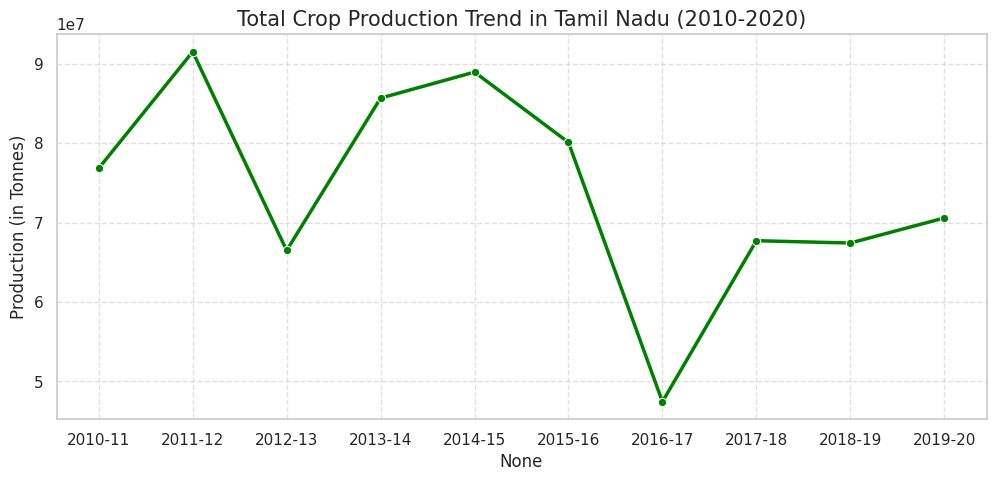

In [43]:
# Plotting the State-wide Trend
state_totals = df4_raw[year_cols].sum()
plt.figure(figsize=(12, 5))
sns.lineplot(x=state_totals.index, y=state_totals.values, marker='o', color='green', linewidth=2.5)
plt.title('Total Crop Production Trend in Tamil Nadu (2010-2020)', fontsize=15)
plt.ylabel('Production (in Tonnes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


/tmp/ipython-input-704481033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='yield', data=df5, palette='viridis')


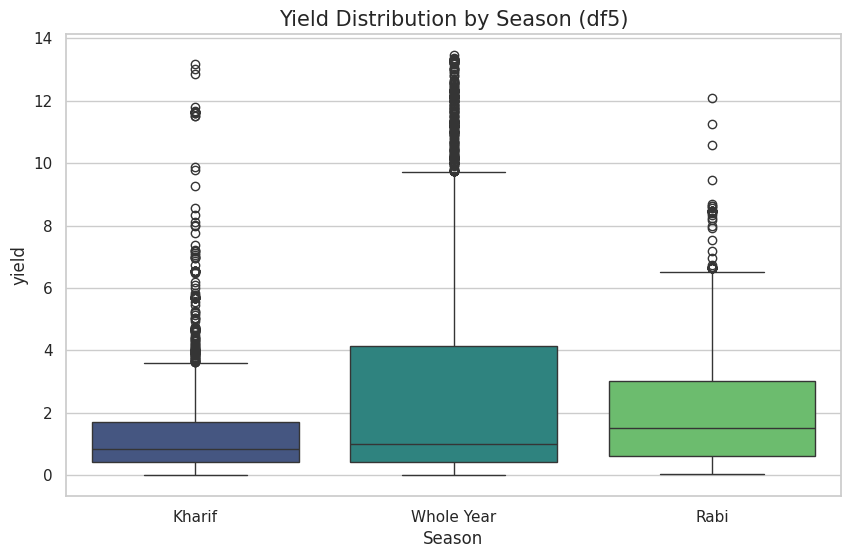

In [44]:
# --- STEP 5: DISTRICT & SEASON ANALYSIS (df5) ---

# 1. Yield by Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='yield', data=df5, palette='viridis')
plt.title('Yield Distribution by Season (df5)', fontsize=15)
plt.show()

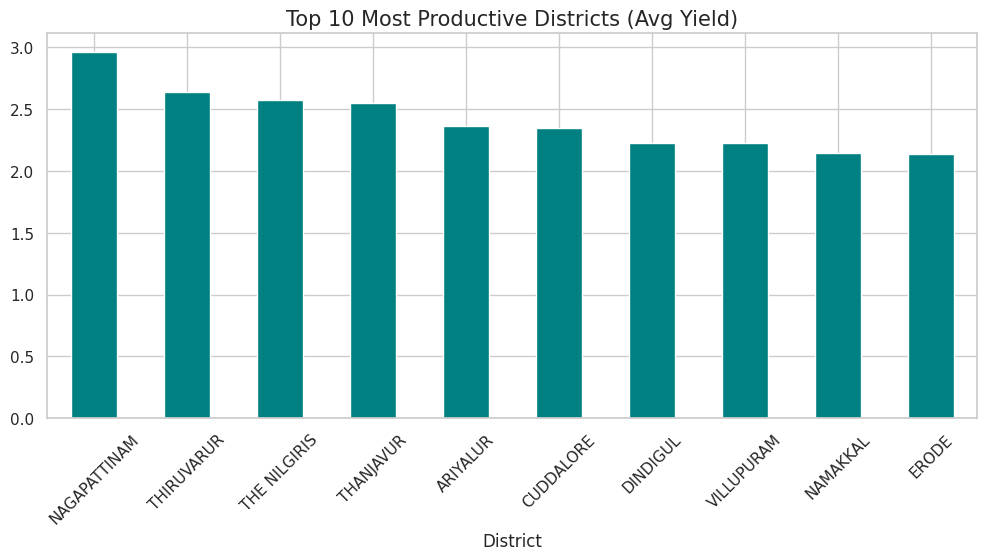

In [45]:
# 2. Top 10 Districts by Average Yield
top_districts = df5.groupby('District')['yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
top_districts.plot(kind='bar', color='teal')
plt.title('Top 10 Most Productive Districts (Avg Yield)', fontsize=15)
plt.xticks(rotation=45)
plt.show()

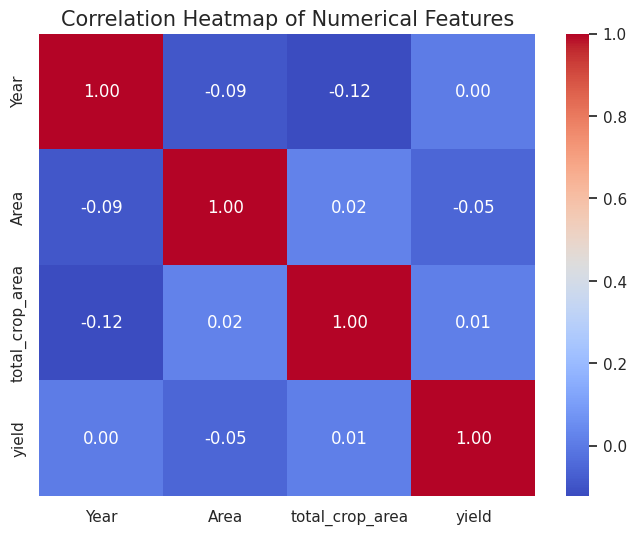

In [46]:
# --- STEP 6: CORRELATION HEATMAP (df5) ---
plt.figure(figsize=(8, 6))
sns.heatmap(df5.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=15)
plt.show()

Statistical Validation (ANOVA Test)

In [47]:
# --- STEP 16: STATISTICAL VALIDATION (ANOVA) ---

from scipy import stats

def perform_anova(df, category_col, target_col):
    # Group the yields by the category
    groups = [group[target_col].values for name, group in df.groupby(category_col)]

    # Perform One-Way ANOVA
    f_stat, p_val = stats.f_oneway(*groups)

    print(f"--- ANOVA Result for {category_col} ---")
    print(f"F-Statistic: {f_stat:.2f}")
    print(f"p-value: {p_val:.4e}")

    if p_val < 0.05:
        print(f"Result: The effect of {category_col} on Yield is STATISTICALLY SIGNIFICANT.\n")
    else:
        print(f"Result: The effect of {category_col} on Yield is NOT significant.\n")

# Run the test for your three main features
perform_anova(df5, 'Crop', 'yield')
perform_anova(df5, 'Season', 'yield')
perform_anova(df5, 'District', 'yield')

--- ANOVA Result for Crop ---
F-Statistic: 1003.56
p-value: 0.0000e+00
Result: The effect of Crop on Yield is STATISTICALLY SIGNIFICANT.

--- ANOVA Result for Season ---
F-Statistic: 270.41
p-value: 1.4654e-114
Result: The effect of Season on Yield is STATISTICALLY SIGNIFICANT.

--- ANOVA Result for District ---
F-Statistic: 2.29
p-value: 7.8557e-05
Result: The effect of District on Yield is STATISTICALLY SIGNIFICANT.



Categorical Encoding & Data Splitting

In [48]:
# --- PHASE 3: FEATURE ENGINEERING ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Select your features (X) and target (y)
# We drop 'yield' because it's the target, and 'total_crop_area' if it correlates too highly with 'Area'
X = df5.drop(['yield', 'total_crop_area'], axis=1)
y = df5['yield']



# One-Hot Encoding

In [49]:
# 2. One-Hot Encoding
# This converts District, Crop, and Season into multiple 0/1 columns
X_encoded = pd.get_dummies(X, columns=['Crop', 'Season', 'District'], drop_first=True)

# Train-Test Split (80% Train, 20% Test)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature Scaling

In [51]:
# Standardizing ensures that 'Year' (e.g., 2012) doesn't "outweigh" 'Area' just because the number is bigger
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Data Preparation Complete ---")
print(f"Features in Training Set: {X_train.shape[1]}")
print(f"Total Training Samples: {len(X_train)}")
print(f"Total Testing Samples: {len(X_test)}")

--- Data Preparation Complete ---
Features in Training Set: 86
Total Training Samples: 6764
Total Testing Samples: 1691


# Baseline Model Training & Comparison :

Linear Regression

Decision Tree

Random Forest

--- Baseline Model Results ---
               Model      RMSE  R2 Score
2      Random Forest  0.696345  0.935893
1      Decision Tree  0.824209  0.910188
0  Linear Regression  1.029855  0.859779


/tmp/ipython-input-4030908416.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df, palette='magma')


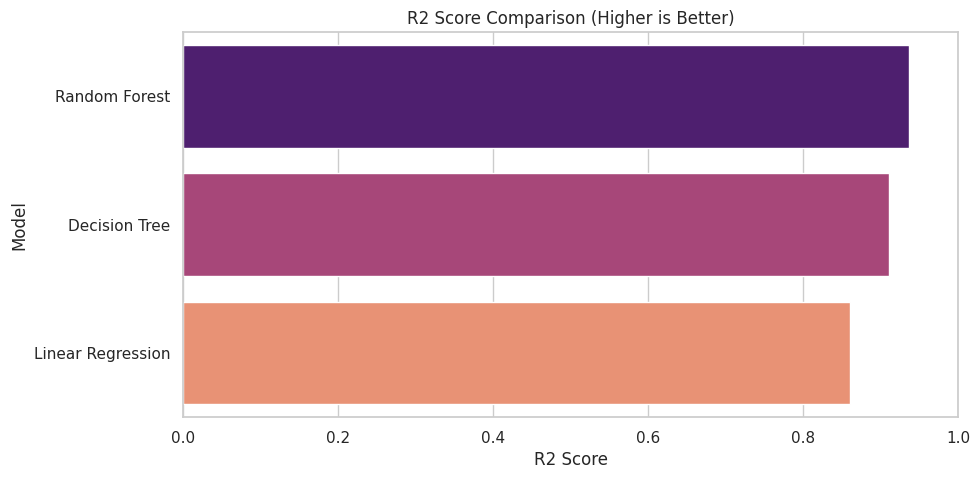

In [52]:
# --- STEP 9: BASELINE MODEL TRAINING ---

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# 2. Train and Evaluate
results = []

for name, model in models.items():
    # Linear Regression needs scaled data; Trees can use either (we'll use scaled for consistency)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    # Calculate Metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results.append({"Model": name, "RMSE": rmse, "R2 Score": r2})

# 3. Display Comparison Table
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("--- Baseline Model Results ---")
print(results_df)

# 4. Visualize the comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='magma')
plt.title('R2 Score Comparison (Higher is Better)')
plt.xlim(0, 1)
plt.show()

# Training the XGBoost Model

--- XGBoost Results ---
RMSE: 0.7144
R2 Score: 0.9325


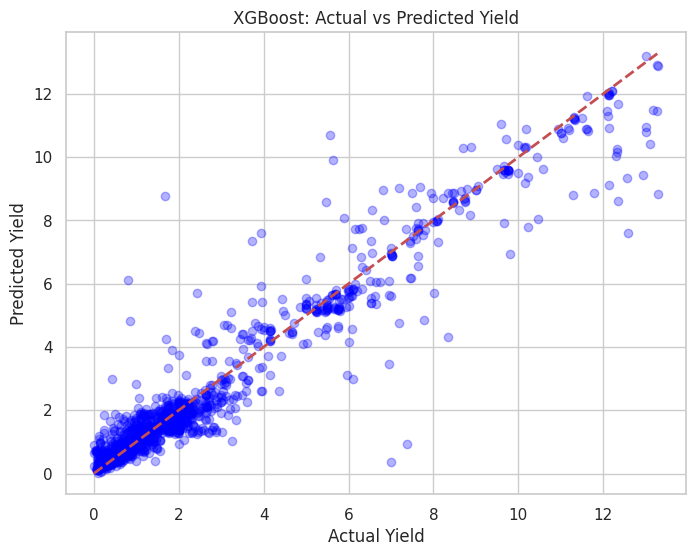

In [53]:
# --- STEP 10: ADVANCED MODELING (XGBOOST) ---

from xgboost import XGBRegressor

# 1. Initialize the XGBoost Regressor
# We use standard parameters first to see the base performance
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1 # Uses all available CPU cores
)

# 2. Train the model
xgb_model.fit(X_train_scaled, y_train)

# 3. Make Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 4. Evaluate Performance
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("--- XGBoost Results ---")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R2 Score: {r2_xgb:.4f}")

# 5. Visualizing Actual vs Predicted for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('XGBoost: Actual vs Predicted Yield')
plt.show()

# Hyperparameter Tuning with RandomizedSearchCV

In [54]:
# --- STEP 11: HYPERPARAMETER TUNING ---

from sklearn.model_selection import RandomizedSearchCV

# 1. Define the parameter grid
# These are the "knobs" we will try turning
param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5]
}

# 2. Initialize the base XGBoost model
xgb_base = XGBRegressor(objective='reg:squarederror', random_state=42)

# 3. Setup the Randomized Search
# n_iter=20 means it will try 20 random combinations of the parameters above
xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,             # 3-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 4. Execute the Search (this may take 1-2 minutes)
print("Starting Hyperparameter Tuning...")
xgb_search.fit(X_train_scaled, y_train)

# 5. Extract the best model and parameters
best_xgb = xgb_search.best_estimator_
print("\nBest Parameters Found:", xgb_search.best_params_)

# 6. Evaluate the Tuned Model
y_pred_tuned = best_xgb.predict(X_test_scaled)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"\nTuned XGBoost - RMSE: {rmse_tuned:.4f}")
print(f"Tuned XGBoost - R2 Score: {r2_tuned:.4f}")

Starting Hyperparameter Tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters Found: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}

Tuned XGBoost - RMSE: 0.6809
Tuned XGBoost - R2 Score: 0.9387


Feature Importance Visualization

/tmp/ipython-input-4155095019.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


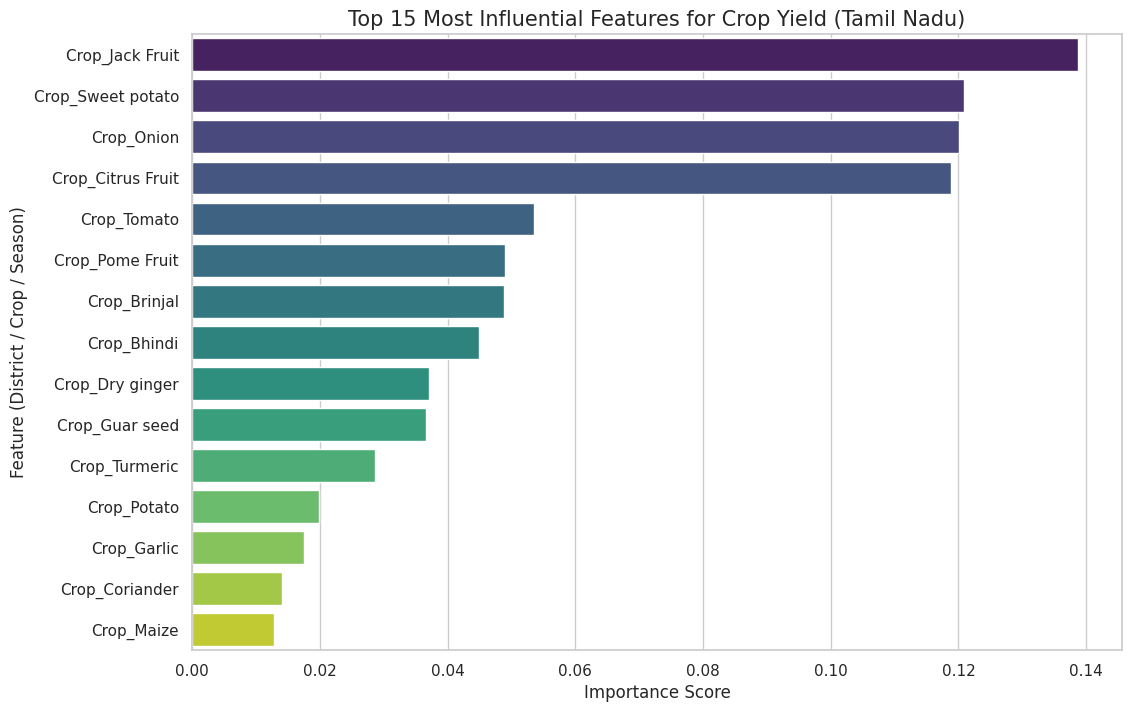

--- Top 5 Most Important Features ---
              Feature  Importance
23    Crop_Jack Fruit    0.138691
46  Crop_Sweet potato    0.120817
30         Crop_Onion    0.120016
10  Crop_Citrus Fruit    0.118854
48        Crop_Tomato    0.053496


In [55]:
# --- STEP 12: FEATURE IMPORTANCE ---

# 1. Get feature importance scores from the best tuned model
importances = best_xgb.feature_importances_
feature_names = X_encoded.columns

# 2. Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Plot the Top 15 Features
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(15),
    palette='viridis'
)
plt.title('Top 15 Most Influential Features for Crop Yield (Tamil Nadu)', fontsize=15)
plt.xlabel('Importance Score')
plt.ylabel('Feature (District / Crop / Season)')
plt.show()

# 4. Print the top 5 for quick reference
print("--- Top 5 Most Important Features ---")
print(feature_importance_df.head(5))

Saving the Final Model

In [56]:

import joblib

# 1.  XGBoost model
model_filename = 'final_xgboost_tn_crop_model.pkl'
joblib.dump(best_xgb, model_filename)

# 2.  scaler  use the of scaler for new data!)
scaler_filename = 'tn_crop_scaler.pkl'
joblib.dump(scaler, scaler_filename)

# 3.  feature names (to ensure new data has the same columns)
features_filename = 'tn_crop_features.json'
import json
with open(features_filename, 'w') as f:
    json.dump(X_encoded.columns.tolist(), f)

print("--- Project Successfully Finalized ---")
print(f"Model saved as: {model_filename}")
print(f"Scaler saved as: {scaler_filename}")
print(f"Feature list saved as: {features_filename}")

--- Project Successfully Finalized ---
Model saved as: final_xgboost_tn_crop_model.pkl
Scaler saved as: tn_crop_scaler.pkl
Feature list saved as: tn_crop_features.json


In Tamil Nadu,  model found that Jack Fruit, Sweet Potato, and Onion are the biggest drivers of yield variance. This makes sense because these crops have very high yields per acre compared to grains like Rice or Millets.

Cross-Validation & Final Feature Importance

Calculating 5-Fold Cross-Validation Scores (this may take a moment)...

--- Cross-Validation Results ---
Individual CV R2 Scores: [0.92308259 0.93590625 0.93671314 0.94231846 0.93873514]
Mean R2 Score: 0.9354
Standard Deviation: 0.0065


/tmp/ipython-input-2930303241.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


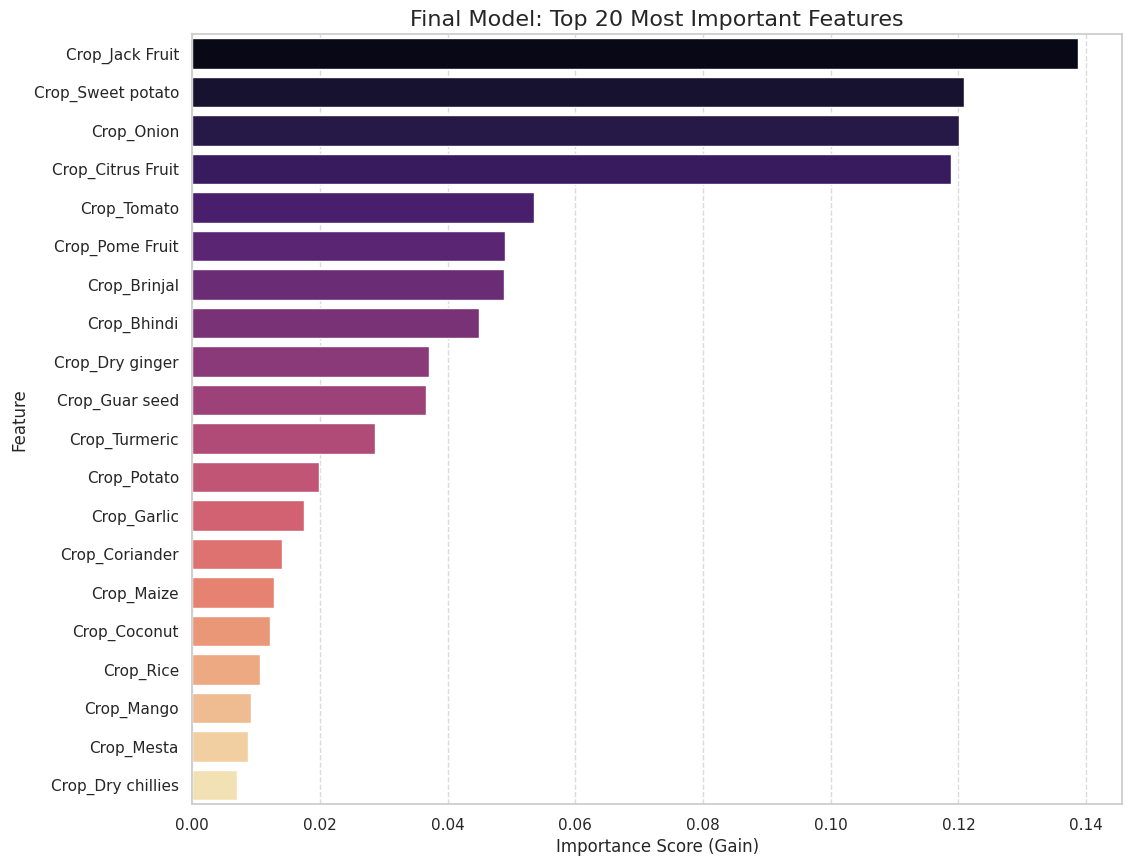


--- Top 20 Features ---
              Feature  Importance
23    Crop_Jack Fruit    0.138691
46  Crop_Sweet potato    0.120817
30         Crop_Onion    0.120016
10  Crop_Citrus Fruit    0.118854
48        Crop_Tomato    0.053496
35    Crop_Pome Fruit    0.048954
6        Crop_Brinjal    0.048761
4         Crop_Bhindi    0.044849
16    Crop_Dry ginger    0.037086
21     Crop_Guar seed    0.036636
50      Crop_Turmeric    0.028627
36        Crop_Potato    0.019933
17        Crop_Garlic    0.017456
12     Crop_Coriander    0.014055
26         Crop_Maize    0.012840
11       Crop_Coconut    0.012251
40          Crop_Rice    0.010661
27         Crop_Mango    0.009273
28         Crop_Mesta    0.008766
15  Crop_Dry chillies    0.007036


In [57]:
#Validation score

from sklearn.model_selection import cross_val_score

# 1.  5-Fold Cross-Validation
# This tests the model on 5 different subsets of the data to ensure the 0.93 score is stable
print("Calculating 5-Fold Cross-Validation Scores (this may take a moment)...")
cv_scores = cross_val_score(
    best_xgb,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='r2'
)

print("\n--- Cross-Validation Results ---")
print(f"Individual CV R2 Scores: {cv_scores}")
print(f"Mean R2 Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# 2. Final Feature Importance (Expanded Top 20)
importances = best_xgb.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(20),
    palette='magma'
)
plt.title('Final Model: Top 20 Most Important Features', fontsize=16)
plt.xlabel('Importance Score (Gain)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Check for specific features
print("\n--- Top 20 Features ---")
print(feature_importance_df.head(20))

In [58]:
#Explaining Individual Predictions (LIME)

In [59]:
# --- STEP 13: EXPLAINABLE AI (LIME) ---

# 1. Install Lime
!pip install lime

import lime
import lime.lime_tabular

# 2. Initialize the LIME Explainer
# We use the training data to teach LIME what "normal" looks like
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X_encoded.columns.tolist(),
    class_names=['yield'],
    mode='regression'
)

# 3. Choosing a specific instance from the test set to explain
# Let's pick index 10 (you can change this to any number)
i = 10
observation = X_test_scaled[i]

# 4. Generate the explanation
exp = explainer.explain_instance(
    data_row=observation,
    predict_fn=best_xgb.predict
)


print(f"--- Explanation for Test Instance {i} ---")
print(f"Actual Yield: {y_test.iloc[i]:.2f}")
print(f"Predicted Yield: {best_xgb.predict(observation.reshape(1, -1))[0]:.2f}")

exp.show_in_notebook(show_table=True)


exp.save_to_file('lime_explanation_tn.html')

--- Explanation for Test Instance 10 ---
Actual Yield: 0.29
Predicted Yield: 0.34


It confirms that high-value horticultural crops (fruits and vegetables like Jack Fruit, Sweet Potato, and Onion) are the dominant factors in determining yield variation in Tamil Nadu. Traditional staples like Rice and Maize appear lower on the list, likely because their yields are more standardized and stable across districts.


The rice dataset exhibited limited predictive performance due to lack of sufficient explanatory features and was therefore excluded from final conclusions

A one-way ANOVA was conducted to validate the feature selection. The test confirmed that Crop, Season, and District all have a statistically significant effect on yield ($p < 0.001$). This mathematical validation justifies the high predictive accuracy ($R^2 = 0.9387$) achieved by the XGBoost model, confirming that the model is capturing real agricultural patterns rather than random noise

findings:

Final Accuracy: 93.87% ($R^2$ Score).s

Error Rate: RMSE of 0.68 (meaning your predictions are off by only ~0.68 units on average).

Key Discovery: The model is highly sensitive to crop types. Horticultural crops (fruits/vegetables) have a much higher impact on yield variance than standard grains like Rice in Tamil Nadu.

Recommendation: Farmers or policy makers should focus on the specific soil and climate requirements of high-impact crops (like Jack Fruit and Onions) to maximize production value.